# Logistic Regression from scratch using numpy...
### Ameet Kumar Rana, Army Institute Of Technology Pune

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class LogisticRegression(object):
    
    def __init__(self,lr,no_iter,s):       #lr is learning hyperparameter and n_iter is no of iterations
        self.lr = lr
        self.no_iter = no_iter
        self.w = np.zeros((s,1))
        self.b = 0
        self.cost_list = []
        self.it = []
        
    def sigmoid(self,k):                   #sigmoid function 
        return (1/(1 + np.exp(-k)))
    
    def forward(self,x):                   
        z = np.dot(x,self.w)+self.b
        a = self.sigmoid(z)
        return a
        
    def calculate(self,x):                  #calculating cost, weight and bias
        a = self.forward(x)
        m = x.shape[0]
        
        cost = (-1/m)*np.sum(y*np.log(a) + (1-y)*np.log(1-a))
        dw = (1/m)*np.dot(x.T,a-y)
        db = (1/m)*np.sum(a-y)
        return dw,db,cost
        
    def fit(self,x,y):                              #this function is to train the linear regression model
        for i in range(self.no_iter):
            dw,db,cost = self.calculate(x)
            self.cost_list.append(cost)
            self.it.append(i)
            self.w = self.w - dw*self.lr
            self.b = self.b - db*self.lr
        return self
        
    def predict(self,x):                            #this function is to predict the output
        arr = np.dot(x,self.w)+self.b
        test = np.full(arr.shape , 0.5)
        test = arr > test
        return test*1
            
    def plot_decision_boundary(self,x,cx):
        x_min , x_max = x[:,0].min() - 0.2 , x[:,0].max() + 0.2
        y_min , y_max = x[:,1].min() - 0.2 , x[:,1].max() + 0.2
        h = 0.1
        xx , yy = np.meshgrid(np.arange(x_min , x_max , h) , np.arange(y_min , y_max , h))
        z = self.predict(np.c_[xx.ravel() , yy.ravel()])
        z = z.reshape(xx.shape)
        plt.contourf(xx,yy,z)
        plt.scatter(x[:,0] , x[:,1] , s = 30, c = cx, cmap=plt.cm.Spectral)
        plt.title('Logistic Regression')
        plt.show()

In [3]:
data = pd.read_csv("data/marks.txt")              #Imported dataset
x,y = data.iloc[:,:-1],data.iloc[:,-1]

In [4]:
cx = y                                            #for color in final plot

In [5]:
p1 = data.loc[y==0]                              #for plotting the graph using plt.legend
p2 = data.loc[y==1]

In [6]:
x = np.asarray(x)                               #converted into numpy arrays
y = np.asarray(y)
y = np.reshape(y,(100,1))
x /= 100                                        #for passing the valid values in log in cost equation

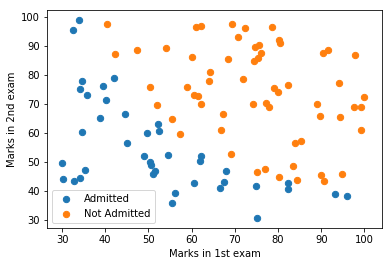

In [7]:
plt.scatter(p1.iloc[:,0],p1.iloc[:,1],s = 40, label = 'Admitted')         #plotting the dataset
plt.scatter(p2.iloc[:,0],p2.iloc[:,1],s = 40, label = 'Not Admitted' )
plt.xlabel('Marks in 1st exam')
plt.ylabel('Marks in 2nd exam')
plt.legend()
plt.show()

In [8]:
model = LogisticRegression(0.1,50000,x.shape[1])        #created class object with parameters

In [9]:
model = model.fit(x,y)                                       #training and predicting

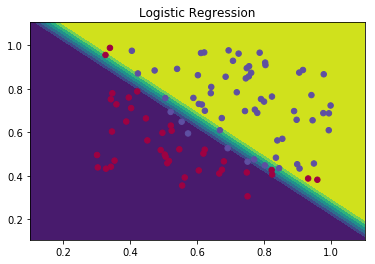

In [10]:
model.plot_decision_boundary(x,cx)                           #plotting final result

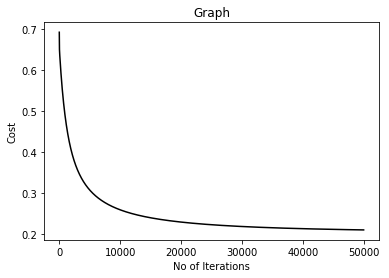

In [11]:
plt.plot(model.it,model.cost_list, c = 'black')                 #plot between cost and iteration no.
plt.title('Graph')
plt.xlabel('No of Iterations')
plt.ylabel('Cost')
plt.show()